In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
from keras.datasets import mnist

In [21]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
test_images.shape

(10000, 28, 28)

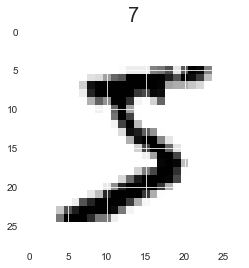

In [24]:
plt.imshow(train_images[0],cmap='gray_r')
plt.title(test_labels[0],fontsize=20)
plt.show()

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [26]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images =test_images.reshape(test_images.shape[0], 28,28,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


#normalize

train_images /= 255
test_images /= 255

In [27]:
train_images.shape

(60000, 28, 28, 1)

In [28]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

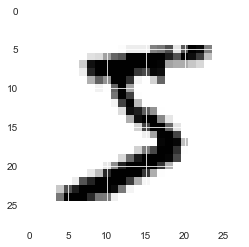

In [29]:
plt.imshow(train_images[0].reshape(28,28),cmap='gray_r')

In [36]:
#CNN
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(56,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_3 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [38]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [44]:
history = model.fit(train_images,train_labels,epochs=2,batch_size=2,validation_split=0.33)

Epoch 1/2
20100/20100 [==============================] - 46s 2ms/step - loss: 0.0436 - accuracy: 0.9882 - val_loss: 0.0525 - val_accuracy: 0.9862
Epoch 2/2
20100/20100 [==============================] - 45s 2ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0680 - val_accuracy: 0.9852


In [41]:
test_labels[200]

3

In [42]:
model.predict(test_images[200].reshape(1,28,28,1)).round(2)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
np.argmax(model.predict(test_images[200].reshape(1,28,28,1)).round(2))

3